<a href="https://colab.research.google.com/github/EduardoMoraesRitter/introducao-a-sistemas-de-recomendacao-com-python/blob/master/dist%C3%A2ncia_euclidiana_entre_usu%C3%A1rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4º Usuarios similares - User Based
tanto que gostaram quanto nao gostaram de filmes, calcular a distancia Euclidiana

In [33]:
#quando tenho um unica reta, ou uma dimencao, ou comparando apenas um filme
#o joao deu nota 3 matrix e maria deu 4 e jose deu 2
joao = [3]
maria = [4]
jose = [2]
#a ditancia é um menos o outro
print('entre maria e joao ', maria[0] - joao[0])
print('entre jose e maria', jose[0] - maria[0])
print('entre joao e jose ', joao[0] - jose[0])

entre maria e joao  1
entre jose e maria -2
entre joao e jose  1


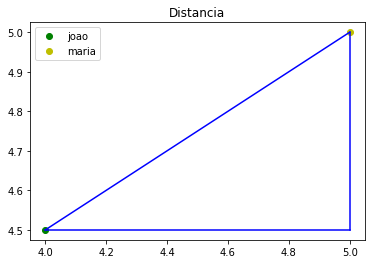

In [59]:
#agora falando mais de um filme ou mais de uma dimenção ou valor
# qual a distancia deles
joao = [4, 4.5]
maria = [5, 5]

import matplotlib.pyplot as plt
plt.plot(4,4.5, "go")
plt.plot(5,5, "yo")
plt.legend(["joao", "maria"])
plt.title("Distancia")

#coloca linha
plt.plot([4,5], [4.5, 4.5], color='b', linestyle="-")
plt.plot([4,5], [4.5, 5], color='b', linestyle="-")
plt.plot([5,5], [4.5, 5], color='b', linestyle="-")

In [61]:
#por padrao nao suporta conta no array
import numpy as np
joao = np.array([4,4.5])
maria = np.array([5,5])
joao-maria

array([-1. , -0.5])

In [0]:
from math import sqrt

def pitagoras(a, b):
  (delta_x, delta_y) = a - b
  quadrado_delta_x = delta_x * delta_x
  quadrado_delta_y = delta_y * delta_y
  hipotenusa = sqrt(quadrado_delta_x + quadrado_delta_y)
  return hipotenusa

In [66]:
# a distancia entre os dois
pitagoras(joao,maria)

1.118033988749895

In [68]:
#no numpy ja tem essa formula
np.linalg.norm(joao - maria)

1.118033988749895

In [0]:
def distancia(a, b):
  return np.linalg.norm(a - b)

In [71]:
#quem é mais parecido de jose, compara esse usuario com todos
jose = np.array([3.5,4.5])
print(distancia(jose, maria))
print(distancia(jose, joao))

1.5811388300841898
0.5


Primeiro extrair as notas

In [0]:
import pandas as pd

filmes = pd.read_csv('movies.csv')
notas = pd.read_csv('ratings.csv')

filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [79]:
#filtar um usuario, pegar duas coluna, colocar com indice
notas_usuario = notas.query('usuarioId==1')
notas_usuario = notas_usuario[['filmeId', 'nota']].set_index("filmeId")
notas_usuario

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [0]:
def notas_usuario(usuarioId):
    notas_usuario = notas.query('usuarioId==%d' % usuarioId)
    notas_usuario = notas_usuario[['filmeId', 'nota']].set_index("filmeId")
    return notas_usuario

In [82]:
u1 = notas_usuario(1)
u4 = notas_usuario(4)
print(u1.head())
print(u4.head())

         nota
filmeId      
1         4.0
3         4.0
6         4.0
47        5.0
50        5.0
         nota
filmeId      
21        3.0
32        2.0
45        3.0
47        2.0
52        3.0


In [84]:
#junta as lista pelo indice para comparar, mudar os nomes das coluna para nao dar over lap
u1.join(u4, lsuffix="u_esq", rsuffix="u_dir")

,notau_esq,notau_dir
filmeId,,
1,4.0,NaN
3,4.0,NaN
6,4.0,NaN
47,5.0,2.0
50,5.0,NaN
...,...,...
3744,4.0,NaN
3793,5.0,NaN
3809,4.0,3.0
